In [ ]:
!pip install pandas numpy scikit-learn tensorflow
!pip install openpyxl


In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [ ]:
#Loading the dataset
df = pd.read_csv(r"/content/Gaza_News_preprocessing.csv")
for col in df.columns:
    print(col)

text
label


In [ ]:
df.head()

,text,label
0,abortion say annies list political group suppo...,0
1,energy history job accomplishment decline coal...,1
2,foreign policy hillary clinton agrees john mcc...,1
3,education chicago bear starting quarterback la...,1
4,ethic person stage worked actively last year p...,1


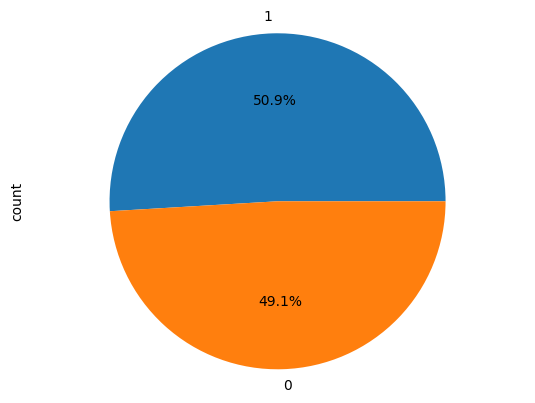

In [ ]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()


In [ ]:
texts = df['text'].astype(str)
labels = df['label']

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

df.head()


,text,label
0,abortion say annies list political group suppo...,0
1,energy history job accomplishment decline coal...,1
2,foreign policy hillary clinton agrees john mcc...,1
3,education chicago bear starting quarterback la...,1
4,ethic person stage worked actively last year p...,1


In [ ]:
# Test model 1:


# train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# tokenizer = Tokenizer(num_words=10000)
# tokenizer.fit_on_texts(train_texts)

# train_sequences = tokenizer.texts_to_sequences(train_texts)
# test_sequences = tokenizer.texts_to_sequences(test_texts)

# max_sequence_length = max(len(seq) for seq in train_sequences)
# train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
# test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

# model = Sequential()
# model.add(Embedding(10000, 128, input_length=max_sequence_length))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

# _, accuracy = model.evaluate(test_data, test_labels)
# print('Accuracy:', accuracy)


In [9]:
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=0)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_sequence_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

model = Sequential()
model.add(Embedding(10000, 128, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=5, batch_size=16, validation_data=(test_data, test_labels))

_, accuracy = model.evaluate(test_data, test_labels)
print('Accuracy:', accuracy)


Epoch 1/5
2706/2706 [==============================] - 1740s 643ms/step - loss: 0.1663 - accuracy: 0.9164 - val_loss: 0.1376 - val_accuracy: 0.9258
Epoch 2/5
2706/2706 [==============================] - 1679s 620ms/step - loss: 0.1074 - accuracy: 0.9485 - val_loss: 0.1491 - val_accuracy: 0.9254
Epoch 3/5
2706/2706 [==============================] - 1694s 626ms/step - loss: 0.0529 - accuracy: 0.9785 - val_loss: 0.1929 - val_accuracy: 0.9238
Epoch 4/5
2706/2706 [==============================] - 1694s 626ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.2523 - val_accuracy: 0.9211
Epoch 5/5
339/339 [==============================] - 125s 368ms/step - loss: 0.3333 - accuracy: 0.9220
Accuracy: 0.9220251441001892


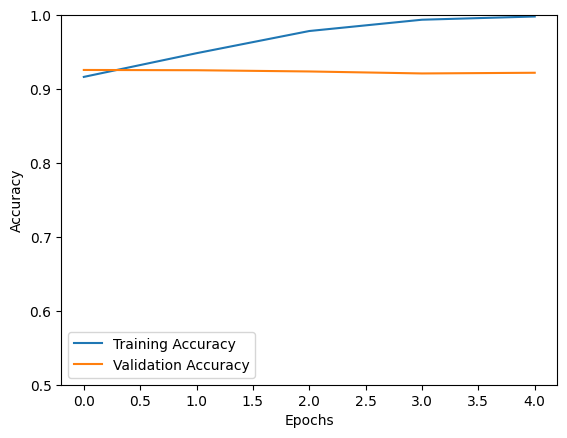

339/339 [==============================] - 133s 390ms/step


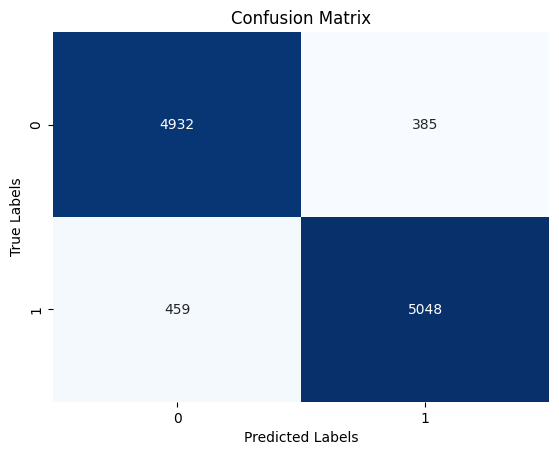

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train the model
# history = model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend()
plt.show()

# Predict on test data
predictions = model.predict(test_data)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Create confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

# # Preprocess the sentence (tokenize and pad it) using the same tokenizer used for training
# sentence1 = ['candidates biography i m probably one of the four or five best known americans in the world 53 attorney republican ']
# sentence2 = ['health care the american people support defunding obamacare and oppose shutting down the government 35 u s senator republican ']
# sentence3 = ['veterans says hillary clinton said the veterans affairs scandal is over exaggerated she said she was satisfied with what was going on 49 president elect republican ']
# sentence4 = ['federal budget health care the american healthcare system burns 18 percent of our national gdp nobody else is close 127 u s senator democrat ']
# sentence5 = ['immigration says marco rubio is the one for an open border 176 candidate for u s senate and physician republican ']

# # Tokenize the sentence using the tokenizer from training
# sequences1 = tokenizer.texts_to_sequences(sentence1)
# sequences2 = tokenizer.texts_to_sequences(sentence2)
# sequences3 = tokenizer.texts_to_sequences(sentence3)
# sequences4 = tokenizer.texts_to_sequences(sentence4)
# sequences5 = tokenizer.texts_to_sequences(sentence5)

# # Pad the sequence to the same length as used during training
# X_test1 = pad_sequences(sequences1, maxlen=max_sequence_length)
# X_test2 = pad_sequences(sequences2, maxlen=max_sequence_length)
# X_test3 = pad_sequences(sequences3, maxlen=max_sequence_length)
# X_test4 = pad_sequences(sequences4, maxlen=max_sequence_length)
# X_test5 = pad_sequences(sequences5, maxlen=max_sequence_length)

# # Make prediction
# prediction1 = model.predict(X_test1)
# prediction2 = model.predict(X_test2)
# prediction3 = model.predict(X_test3)
# prediction4 = model.predict(X_test4)
# prediction5 = model.predict(X_test5)

# print("The prediction for the sentence is:", prediction1)
# print("The prediction for the sentence is:", prediction2)
# print("The prediction for the sentence is:", prediction3)
# print("The prediction for the sentence is:", prediction4)
# print("The prediction for the sentence is:", prediction5)

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have already trained and compiled the CNN model
# Assuming you have a sentence to test named 'sentence'

# Preprocess the sentence (tokenize and pad it) using the same tokenizer used for training
sentence1 = ['israel terrorism far war gaza left palestinian dead population equivalent host reid report none']
sentence2 = ['israel war gaza live unrelenting nightmare weary palestinians israel attack rafah major operation u state department say even though thousand troop area dozen palestinian killed one million people displaced']
sentence3 = ['airstrike that killed aid workers in Gaza“‘A Hamas roadside bomb killed the aid workers —Israel,’”   Mossad wrote soon after news of the incident broke that it appeared to have been caused “by a side bomb planted by Hamas.” ']
sentence4 = ['israel war gazaat least palestinian killed wounded throughout war battered territory hour including southern rafah israeli force continue bomb invade']
sentence5 = ['covid showing symptom transmit disease everyone covid symptom transmit disease important self isolate day']

# Tokenize the sentence using the tokenizer from training
sequences1 = tokenizer.texts_to_sequences(sentence1)
sequences2 = tokenizer.texts_to_sequences(sentence2)
sequences3 = tokenizer.texts_to_sequences(sentence3)
sequences4 = tokenizer.texts_to_sequences(sentence4)
sequences5 = tokenizer.texts_to_sequences(sentence5)

# Pad the sequence to the same length as used during training
X_test1 = pad_sequences(sequences1, maxlen=max_sequence_length)
X_test2 = pad_sequences(sequences2, maxlen=max_sequence_length)
X_test3 = pad_sequences(sequences3, maxlen=max_sequence_length)
X_test4 = pad_sequences(sequences4, maxlen=max_sequence_length)
X_test5 = pad_sequences(sequences5, maxlen=max_sequence_length)

prediction1 = model.predict(X_test1)
prediction2 = model.predict(X_test2)
prediction3 = model.predict(X_test3)
prediction4 = model.predict(X_test4)
prediction5 = model.predict(X_test5)

# Set a threshold for classification (e.g., 0.5)
threshold = 0.5

# Make prediction and convert probabilities to binary based on the threshold
prediction1 = (prediction1 > threshold).astype(int)
prediction2 = (prediction2 > threshold).astype(int)
prediction3 = (prediction3 > threshold).astype(int)
prediction4 = (prediction4 > threshold).astype(int)
prediction5 = (prediction5 > threshold).astype(int)

print("The prediction for the first sentence is:", prediction1)
print("The prediction for the second sentence is:", prediction2)
print("The prediction for the third sentence is:", prediction3)
print("The prediction for the fourth sentence is:", prediction4)
print("The prediction for the fifth sentence is:", prediction5)





1/1 [==============================] - 0s 31ms/step
The prediction for the first sentence is: [[0]]
The prediction for the second sentence is: [[1]]
The prediction for the third sentence is: [[0]]
The prediction for the fourth sentence is: [[1]]
The prediction for the fifth sentence is: [[0]]


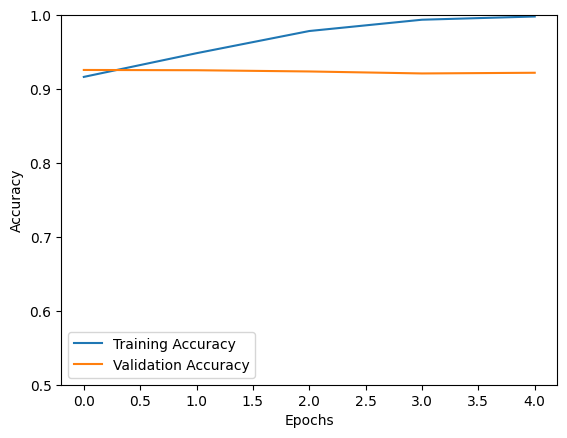

339/339 [==============================] - 142s 418ms/step


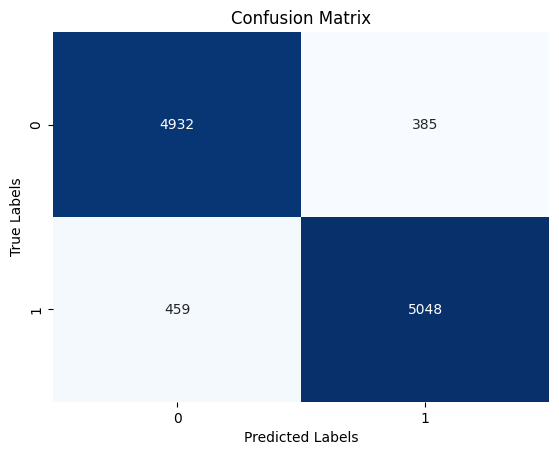

Classification Report:
              precision    recall  f1-score   support

        fake       0.91      0.93      0.92      5317
        real       0.93      0.92      0.92      5507

    accuracy                           0.92     10824
   macro avg       0.92      0.92      0.92     10824
weighted avg       0.92      0.92      0.92     10824

Accuracy: 92.20%
Precision (Fake): 91.49%
Precision (Real): 92.91%
Recall (Fake): 92.76%
Recall (Real): 91.67%
F1-Score (Fake): 92.12%
F1-Score (Real): 92.29%
Confusion Matrix:
[[4932  385]
 [ 459 5048]]


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support

# Train the model
# history = model.fit(train_data, train_labels, epochs=10, batch_size=16, validation_data=(test_data, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend()
plt.show()

# Predict on test data
predictions = model.predict(test_data)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Create confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
report = classification_report(test_labels, predicted_labels, target_names=['fake', 'real'])
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average=None)

# Print precision, recall, and F1-score in percentage
print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


In [16]:
from tensorflow.keras.models import load_model
import pickle

In [19]:
# Save the model
model.save('DeepLearningCNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
# Save the tokenizer
with open('modeltokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)